In [5]:
import quandl
quandl.ApiConfig.api_key = 'nsqaaHBqkWMWVvYEH9-9'

In [10]:
aapl_table = quandl.get('WIKI/AAPL')
aapl = aapl_table['Adj. Close']['2017']
aapl

Date
2017-01-03    114.715378
2017-01-04    114.586983
2017-01-05    115.169696
2017-01-06    116.453639
2017-01-09    117.520300
                 ...    
2017-12-22    175.010000
2017-12-26    170.570000
2017-12-27    170.600000
2017-12-28    171.080000
2017-12-29    169.230000
Name: Adj. Close, Length: 249, dtype: float64

In [11]:
aapl['2017-3']

Date
2017-03-01    138.657681
2017-03-02    137.834404
2017-03-03    138.647762
2017-03-06    138.211326
2017-03-07    138.389868
2017-03-08    137.874080
2017-03-09    137.556672
2017-03-10    138.012946
2017-03-13    138.072460
2017-03-14    137.864161
2017-03-15    139.322254
2017-03-16    139.550391
2017-03-17    138.856061
2017-03-20    140.314154
2017-03-21    138.707276
2017-03-22    140.274478
2017-03-23    139.778528
2017-03-24    139.500796
2017-03-27    139.738852
2017-03-28    142.635200
2017-03-29    142.952608
2017-03-30    142.764147
2017-03-31    142.496334
Name: Adj. Close, dtype: float64

In [12]:
aapl['2017-2':'2017-4']

Date
2017-02-01    127.159749
2017-02-02    126.942467
2017-02-03    127.485673
2017-02-06    128.680728
2017-02-07    129.905412
                 ...    
2017-04-24    142.476496
2017-04-25    143.369205
2017-04-26    142.487208
2017-04-27    142.625281
2017-04-28    142.486415
Name: Adj. Close, Length: 61, dtype: float64

In [14]:
aapl.head()

Date
2017-01-03    114.715378
2017-01-04    114.586983
2017-01-05    115.169696
2017-01-06    116.453639
2017-01-09    117.520300
Name: Adj. Close, dtype: float64

In [16]:
aapl.tail(10)

Date
2017-12-15    173.87
2017-12-18    176.42
2017-12-19    174.54
2017-12-20    174.35
2017-12-21    175.01
2017-12-22    175.01
2017-12-26    170.57
2017-12-27    170.60
2017-12-28    171.08
2017-12-29    169.23
Name: Adj. Close, dtype: float64

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='Date'>

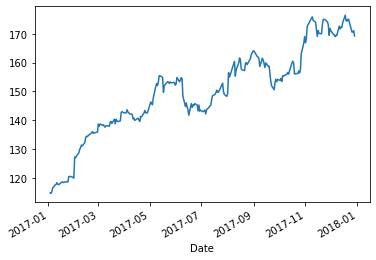

In [19]:
aapl.plot()

<AxesSubplot:xlabel='Date'>

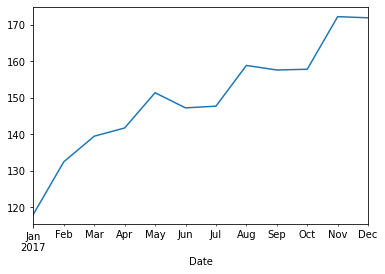

In [20]:
by_month = aapl.resample('M').mean()
by_month.plot()

<AxesSubplot:xlabel='Date'>

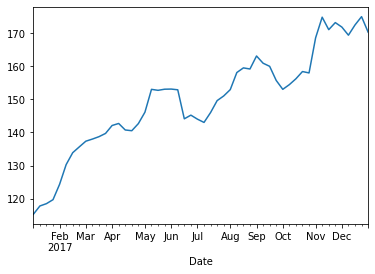

In [23]:
by_week = aapl.resample('W').mean()
by_week.plot()

In [24]:
three_day = aapl.resample('3D').mean()
two_week = aapl.resample('2W').mean()
two_month = aapl.resample('2M').mean()

In [25]:
std = aapl.resample('W').std()
max_ = aapl.resample('W').max()
min_ = aapl.resample('W').min()

<AxesSubplot:xlabel='Date'>

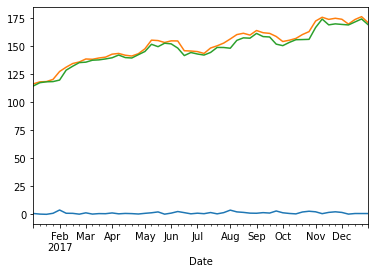

In [27]:
std.plot()
max_.plot()
min_.plot()

In [47]:
last_day = aapl.resample('M').agg(lambda x: x[-1])
last_day

Date
2017-01-31    119.851150
2017-02-28    135.880362
2017-03-31    142.496334
2017-04-30    142.486415
2017-05-31    152.142689
2017-06-30    143.438008
2017-07-31    148.248489
2017-08-31    164.000000
2017-09-30    154.120000
2017-10-31    169.040000
2017-11-30    171.850000
2017-12-31    169.230000
Freq: M, Name: Adj. Close, dtype: float64

<AxesSubplot:xlabel='Date'>

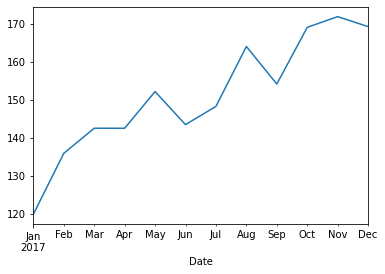

In [29]:
last_day.plot()

In [30]:
monthly_return = aapl.resample('M').agg(lambda x: x[-1]/x[1] -1)
monthly_return

Date
2017-01-31    0.045940
2017-02-28    0.070409
2017-03-31    0.033823
2017-04-30   -0.007736
2017-05-31    0.039829
2017-06-30   -0.073528
2017-07-31    0.033035
2017-08-31    0.047890
2017-09-30   -0.049112
2017-10-31    0.094252
2017-11-30    0.022247
2017-12-31   -0.003357
Freq: M, Name: Adj. Close, dtype: float64

<AxesSubplot:xlabel='Date'>

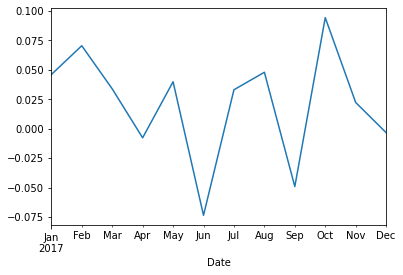

In [31]:
monthly_return.plot()

In [32]:
monthly_return.mean()

0.02114094011940022

In [33]:
monthly_return.std()

0.04775652864223314

In [34]:
monthly_return.max()

0.09425168306576914

In [40]:
last_day.diff().head()

Date
2017-01-31 00:00:00         NaN
2017-02-28 00:00:00     16.0292
2017-03-31 00:00:00     6.61597
2017-04-30 00:00:00   -0.009919
2017-05-31 00:00:00     9.65627
Name: Adj. Close, dtype: object

In [41]:
last_day.pct_change().head()

Date
2017-01-31 00:00:00            NaN
2017-02-28 00:00:00       0.133743
2017-03-31 00:00:00      0.0486897
2017-04-30 00:00:00   -6.96088e-05
2017-05-31 00:00:00      0.0677698
Name: Adj. Close, dtype: object

In [51]:
daily_return = last_day.pct_change()#.dropna() or .fillna(method = 'bfill')

In [52]:
daily_return.to_frame().head()

,Adj. Close
Date,
2017-01-31,NaN
2017-02-28,0.133743
2017-03-31,0.048690
2017-04-30,-0.000070
2017-05-31,0.067770


# Data Frames

In [53]:
dict = {'AAPL': [143.5,  144.09, 142.73, 144.18, 143.77],
        'GOOG': [898.7,  911.71, 906.69, 918.59, 926.99],
        'IBM':  [155.58, 153.67, 152.36, 152.94, 153.49]}
dates = pd.date_range('2017-07-03', periods = 5, freq = 'D')
df = pd.DataFrame(dict, index = dates)

In [54]:
df

,AAPL,GOOG,IBM
2017-07-03,143.50,898.70,155.58
2017-07-04,144.09,911.71,153.67
2017-07-05,142.73,906.69,152.36
2017-07-06,144.18,918.59,152.94
2017-07-07,143.77,926.99,153.49


In [55]:
df_aapl = pd.DataFrame()
df_aapl = aapl_table

<AxesSubplot:xlabel='Date'>

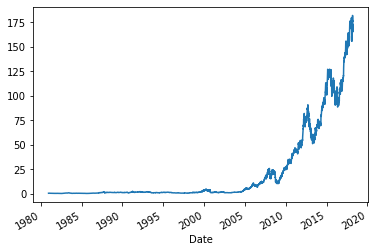

In [57]:
df_aapl['Adj. Close'].plot()

In [59]:
aapl_2016 = df_aapl['2016']
aapl_2016_m = aapl_2016.resample('M').agg(lambda x: x[-1])
aapl_2016_m

,Open,High,Low,Close,Volume,Ex-Dividend,Split Ratio,Adj. Open,Adj. High,Adj. Low,Adj. Close,Adj. Volume
Date,,,,,,,,,,,,
2016-01-31,94.79,97.3400,94.35,97.34,64416504.0,0.0,1.0,91.581233,94.044912,91.156128,94.044912,64416504.0
2016-02-29,96.86,98.2300,96.65,96.69,35216277.0,0.0,1.0,94.084911,95.415659,93.880927,93.919781,35216277.0
2016-03-31,109.72,109.9000,108.88,108.99,25888449.0,0.0,1.0,106.576465,106.751308,105.760531,105.867380,25888449.0
2016-04-30,93.99,94.7200,92.51,93.74,68531478.0,0.0,1.0,91.297138,92.006223,89.859540,91.054300,68531478.0
2016-05-31,99.60,100.4000,98.82,99.86,42307212.0,0.0,1.0,97.337844,98.119674,96.575559,97.591939,42307212.0
2016-06-30,94.44,95.7700,94.30,95.60,35836356.0,0.0,1.0,92.295040,93.594832,92.158220,93.428693,35836356.0
2016-07-31,104.19,104.5500,103.68,104.21,27733688.0,0.0,1.0,101.823594,102.175417,101.325177,101.843140,27733688.0
2016-08-31,105.66,106.5699,105.64,106.10,29662406.0,0.0,1.0,103.816156,104.710177,103.796505,104.248477,29662406.0
2016-09-30,112.46,113.3700,111.80,113.05,36379106.0,0.0,1.0,110.497491,111.391610,109.849008,111.077195,36379106.0


In [60]:
aapl_bar = aapl_2016_m[['Open', 'High', 'Low', 'Close']]
aapl_bar

,Open,High,Low,Close
Date,,,,
2016-01-31,94.79,97.3400,94.35,97.34
2016-02-29,96.86,98.2300,96.65,96.69
2016-03-31,109.72,109.9000,108.88,108.99
2016-04-30,93.99,94.7200,92.51,93.74
2016-05-31,99.60,100.4000,98.82,99.86
2016-06-30,94.44,95.7700,94.30,95.60
2016-07-31,104.19,104.5500,103.68,104.21
2016-08-31,105.66,106.5699,105.64,106.10
2016-09-30,112.46,113.3700,111.80,113.05


In [62]:
aapl_bar.loc['2016-3':'2016-9',['Open', 'Close']]

,Open,Close
Date,,
2016-03-31,109.72,108.99
2016-04-30,93.99,93.74
2016-05-31,99.60,99.86
2016-06-30,94.44,95.60
2016-07-31,104.19,104.21
2016-08-31,105.66,106.10
2016-09-30,112.46,113.05


In [63]:
open_mean = aapl_bar['Open'].mean()

In [64]:
open_mean

104.46416666666669

In [65]:
aapl_above = aapl_bar[aapl_bar['Open']>open_mean]

In [66]:
aapl_above

,Open,High,Low,Close
Date,,,,
2016-03-31,109.72,109.9000,108.88,108.99
2016-08-31,105.66,106.5699,105.64,106.10
2016-09-30,112.46,113.3700,111.80,113.05
2016-10-31,113.65,114.2300,113.20,113.54
2016-11-30,111.56,112.2000,110.27,110.52
2016-12-31,116.65,117.2000,115.43,115.82


In [69]:
aapl_bar['rate return'] = aapl_bar['Close'].pct_change()

<ipython-input-69-05e12dc2cf17>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aapl_bar['rate return'] = aapl_bar['Close'].pct_change()


In [71]:
aapl_bar

,Open,High,Low,Close,rate return
Date,,,,,
2016-01-31,94.79,97.3400,94.35,97.34,NaN
2016-02-29,96.86,98.2300,96.65,96.69,-0.006678
2016-03-31,109.72,109.9000,108.88,108.99,0.127211
2016-04-30,93.99,94.7200,92.51,93.74,-0.139921
2016-05-31,99.60,100.4000,98.82,99.86,0.065287
2016-06-30,94.44,95.7700,94.30,95.60,-0.042660
2016-07-31,104.19,104.5500,103.68,104.21,0.090063
2016-08-31,105.66,106.5699,105.64,106.10,0.018136
2016-09-30,112.46,113.3700,111.80,113.05,0.065504


In [72]:
aapl_bar.dropna()

,Open,High,Low,Close,rate return
Date,,,,,
2016-02-29,96.86,98.2300,96.65,96.69,-0.006678
2016-03-31,109.72,109.9000,108.88,108.99,0.127211
2016-04-30,93.99,94.7200,92.51,93.74,-0.139921
2016-05-31,99.60,100.4000,98.82,99.86,0.065287
2016-06-30,94.44,95.7700,94.30,95.60,-0.042660
2016-07-31,104.19,104.5500,103.68,104.21,0.090063
2016-08-31,105.66,106.5699,105.64,106.10,0.018136
2016-09-30,112.46,113.3700,111.80,113.05,0.065504
2016-10-31,113.65,114.2300,113.20,113.54,0.004334


In [73]:
s1 = pd.Series([143.5, 144.09, 142.73, 144.18, 143.77], name = 'AAPL')
s2 = pd.Series([898.7, 911.71, 906.69, 918.59, 926.99], name = 'GOOG')
data_frame = pd.concat([s1, s2], axis = 1)

In [74]:
data_frame

,AAPL,GOOG
0,143.50,898.70
1,144.09,911.71
2,142.73,906.69
3,144.18,918.59
4,143.77,926.99


In [75]:
import numpy as np

In [76]:
log_price = np.log(aapl_bar.Close)
log_price.name = 'log_Close'

In [78]:
aapl_bar_log = pd.concat([aapl_bar, log_price], axis = 1)

In [79]:
aapl_bar_log

,Open,High,Low,Close,rate return,log_Close
Date,,,,,,
2016-01-31,94.79,97.3400,94.35,97.34,NaN,4.578210
2016-02-29,96.86,98.2300,96.65,96.69,-0.006678,4.571510
2016-03-31,109.72,109.9000,108.88,108.99,0.127211,4.691256
2016-04-30,93.99,94.7200,92.51,93.74,-0.139921,4.540525
2016-05-31,99.60,100.4000,98.82,99.86,0.065287,4.603769
2016-06-30,94.44,95.7700,94.30,95.60,-0.042660,4.560173
2016-07-31,104.19,104.5500,103.68,104.21,0.090063,4.646408
2016-08-31,105.66,106.5699,105.64,106.10,0.018136,4.664382
2016-09-30,112.46,113.3700,111.80,113.05,0.065504,4.727830


In [80]:
df_volume = aapl_table.loc['2016-10':'2017-04', ['Volume', 'Split Ratio']].resample('M').agg(lambda x: x[-1])

In [81]:
df_volume

,Volume,Split Ratio
Date,,
2016-10-31,26419398.0,1.0
2016-11-30,36162258.0,1.0
2016-12-31,30586265.0,1.0
2017-01-31,49200993.0,1.0
2017-02-28,23482860.0,1.0
2017-03-31,19661651.0,1.0
2017-04-30,20247187.0,1.0


In [82]:
df_2017 = aapl_table.loc['2016-10':'2017-04', ['Open', 'High', 'Low', 'Close']].resample('M').agg(lambda x: x[-1])

In [83]:
df_2017

,Open,High,Low,Close
Date,,,,
2016-10-31,113.65,114.230,113.20,113.54
2016-11-30,111.56,112.200,110.27,110.52
2016-12-31,116.65,117.200,115.43,115.82
2017-01-31,121.15,121.390,120.62,121.35
2017-02-28,137.08,137.435,136.70,136.99
2017-03-31,143.72,144.270,143.01,143.66
2017-04-30,144.09,144.300,143.27,143.65


In [84]:
test_concat = pd.concat([aapl_bar, df_volume], axis = 1)
test_concat

,Open,High,Low,Close,rate return,Volume,Split Ratio
Date,,,,,,,
2016-01-31,94.79,97.3400,94.35,97.34,NaN,NaN,NaN
2016-02-29,96.86,98.2300,96.65,96.69,-0.006678,NaN,NaN
2016-03-31,109.72,109.9000,108.88,108.99,0.127211,NaN,NaN
2016-04-30,93.99,94.7200,92.51,93.74,-0.139921,NaN,NaN
2016-05-31,99.60,100.4000,98.82,99.86,0.065287,NaN,NaN
2016-06-30,94.44,95.7700,94.30,95.60,-0.042660,NaN,NaN
2016-07-31,104.19,104.5500,103.68,104.21,0.090063,NaN,NaN
2016-08-31,105.66,106.5699,105.64,106.10,0.018136,NaN,NaN
2016-09-30,112.46,113.3700,111.80,113.05,0.065504,NaN,NaN


In [85]:
test_concat1 = pd.concat([aapl_bar, df_volume], axis = 1, join = 'inner')
test_concat1

,Open,High,Low,Close,rate return,Volume,Split Ratio
Date,,,,,,,
2016-10-31,113.65,114.23,113.20,113.54,0.004334,26419398.0,1.0
2016-11-30,111.56,112.20,110.27,110.52,-0.026599,36162258.0,1.0
2016-12-31,116.65,117.20,115.43,115.82,0.047955,30586265.0,1.0


In [87]:
append_test = aapl_bar.append(df_2017)
append_test

,Open,High,Low,Close,rate return
Date,,,,,
2016-01-31,94.79,97.3400,94.35,97.34,NaN
2016-02-29,96.86,98.2300,96.65,96.69,-0.006678
2016-03-31,109.72,109.9000,108.88,108.99,0.127211
2016-04-30,93.99,94.7200,92.51,93.74,-0.139921
2016-05-31,99.60,100.4000,98.82,99.86,0.065287
2016-06-30,94.44,95.7700,94.30,95.60,-0.042660
2016-07-31,104.19,104.5500,103.68,104.21,0.090063
2016-08-31,105.66,106.5699,105.64,106.10,0.018136
2016-09-30,112.46,113.3700,111.80,113.05,0.065504


In [88]:
test_concat2 = pd.concat([aapl_bar, df_2017], axis = 0)
test_concat2

,Open,High,Low,Close,rate return
Date,,,,,
2016-01-31,94.79,97.3400,94.35,97.34,NaN
2016-02-29,96.86,98.2300,96.65,96.69,-0.006678
2016-03-31,109.72,109.9000,108.88,108.99,0.127211
2016-04-30,93.99,94.7200,92.51,93.74,-0.139921
2016-05-31,99.60,100.4000,98.82,99.86,0.065287
2016-06-30,94.44,95.7700,94.30,95.60,-0.042660
2016-07-31,104.19,104.5500,103.68,104.21,0.090063
2016-08-31,105.66,106.5699,105.64,106.10,0.018136
2016-09-30,112.46,113.3700,111.80,113.05,0.065504


In [90]:
#df_2017.columms = ['Change', 'High', 'Low', 'Close']
#test_concat3 = pd.concat([aapl_bar,df_2017], axis = 0)
#test_concat3